<a href="https://colab.research.google.com/github/DonaFidele/Mes_notebooks/blob/main/statistique_inf%C3%A9rentielle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("essence.txt")
data.head()

,conso
0,30.65
1,31.35
2,33.03
3,31.94
4,32.05


In [ ]:
data.describe().round(2)

,conso
count,128.00
mean,31.45
std,2.16
min,26.23
25%,30.20
50%,31.55
75%,32.99
max,36.07


In [ ]:
moyenne=data['conso'].mean().round(2)
moyenne

31.45

In [ ]:
ecart_type=data['conso'].std()

In [ ]:
#variance biaisée
np.var([data['conso']]).round(2)

4.63

In [ ]:
#variance non biaisée
np.var([data['conso']],ddof=1).round(2)

4.66

(array([ 5.,  2., 12., 10., 21., 26., 20., 18.,  6.,  7.,  1.]),
 array([26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37.]),
 <BarContainer object of 11 artists>)

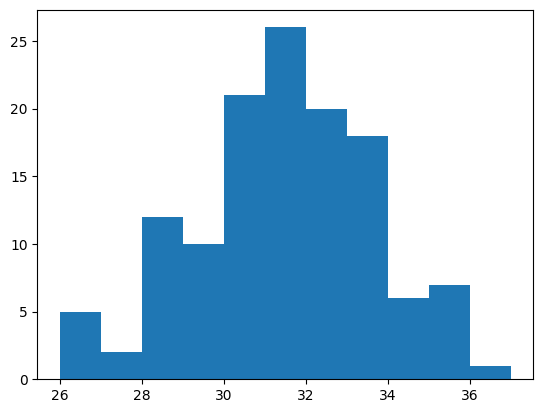

In [ ]:
#visualisons l'histogramme
plt.hist(data['conso'],bins=range(26,38))



On peut visualiser sur cet histogramme la moyenne empirique :


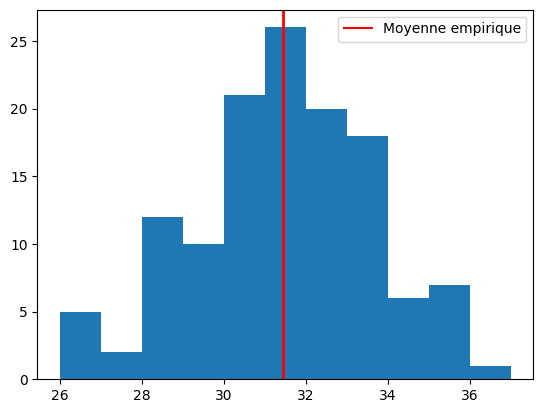

In [ ]:
plt.hist(data['conso'],bins=range(26,38))
plt.axvline(moyenne,color='r', linewidth=2)
import matplotlib.lines as mlines
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])

On peut visualiser sur cet histogramme la moyenne empirique et le seuil “métier” (le seuil métier est la valeur sur laquelle souhaite communiquer le constructeur : 31 litres au cent) :

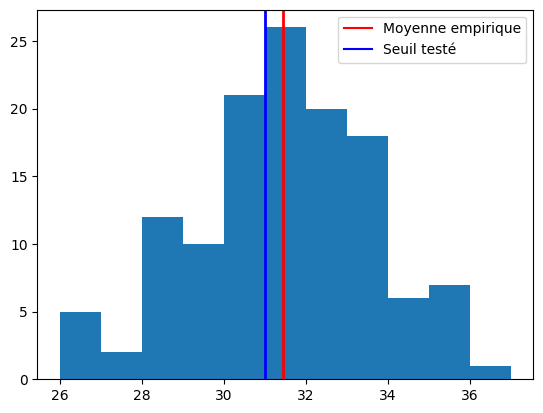

In [ ]:
seuil=31
plt.hist(data['conso'],bins=range(26,38))
plt.axvline(moyenne,color='r',linewidth=2)
plt.axvline(seuil,color='b',linewidth=2)
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique"),mlines.Line2D([], [], color='blue',markersize=15, label=u"Seuil testé")])

On peut enfin superposer sur cet histogramme la densité gaussienne :

Text(0.5, 1.0, 'Histogramme et densité normale')

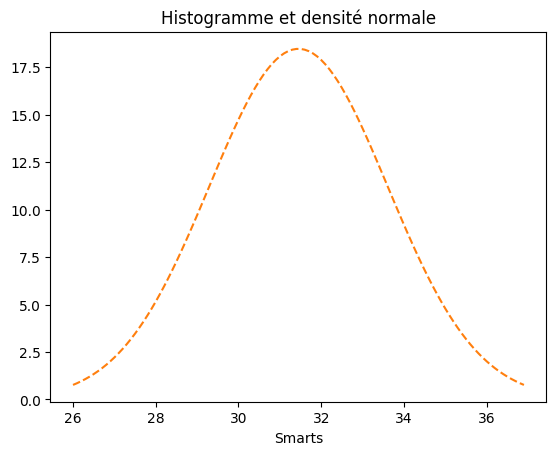

In [ ]:
from matplotlib import patches
import matplotlib.mlab as mlab
from scipy.stats import norm

fig,ax=plt.subplots()
n,bins,patches=ax.hist(data['conso'],normed=True,bins=range(26,3,8))
bins=np.arange(26,37,0.1)
y=norm.pdf(bins,moyenne,ecart_type)*100
ax.plot(bins,y,'--')
ax.set_xlabel('Smarts')
ax.set_title(u"Histogramme et densité normale")

On constate que l’écart entre l’histogramme, primo-estimation de la densité de probabilité, et la densité gaussienne sont plutôt proches (car la courbe rouge et l'histogramme sont quasiment superposables).

# Déterminez un intervalle de confiance sur une proportion

In [ ]:
data = pd.read_csv("guerison.txt")
data.head()

,guerison
0,1
1,0
2,1
3,1
4,1


On peut estimer le taux de guérison théorique p

In [ ]:
taux_de_gueris=data['guerison'].sum()/len(data['guerison'])
taux_de_gueris


0.7731481481481481

In [ ]:


n_guerison=len(data)
n_guerison_gueris= sum(data[data["guerison"]==1]["guerison"])
p_estim= n_guerison_gueris/float(n_guerison)

p_estim

0.7731481481481481

 Si on souhaite encadrer le taux de guérison p avec une probabilité de  1−α=95% , on obtient alors comme intervalle de confiance  Φ1−α2=Φ0.975≃1.96

⎡⎣167216−1.96 167216(1−167216)216−−−−−−−−−−−√ ; 167216+1.96 167216(1−167216)216−−−−−−−−−−−√⎤⎦ .

Si on lance “manuellement” les calculs au niveau de test 5% :

In [ ]:
from scipy.stats import norm
from numpy import math
alpha=0.05
icinf=taux_de_gueris-norm.ppf(1-alpha/2)*math.sqrt((taux_de_gueris*(1-taux_de_gueris))/len(data['guerison']))
icinf.round(2)

0.72

In [ ]:
icsup=taux_de_gueris+norm.ppf(1-alpha/2)*math.sqrt((taux_de_gueris*(1-taux_de_gueris))/len(data['guerison']))
icsup.round(2)

0.83

On obtient alors :
[0.72 ; 0.82]=[72% ; 83%] 

On constate que la largeur de l’intervalle n’est pas négligeable, mais n’oublions pas qu’il n’y a que 216 individus dans l’échantillon.

En pratique, le data analyst peut obtenir simplement cet intervalle à l’aide de la commande  proportion_confint  (cette commande lance d’autres calculs en sus de l’intervalle de confiance, on les verra plus tard) :

In [ ]:
from statsmodels.stats.proportion import proportion_confint
proportion_confint(n_guerison_gueris,n_guerison,alpha,method='normal')

(0.7172980758199328, 0.8289982204763635)

Les résultats numériques diffèrent légèrement à cause d’une “correction de normalité” effectuée par cette commande.

Enfin, si on avait choisi un niveau de confiance plus faible, 1−α=90% par exemple, on aurait obtenu un intervalle de confiance plus étroit :

In [ ]:
proportion_confint(n_guerison_gueris,n_guerison,alpha=0.1,method='normal')

(0.7262772899287175, 0.8200190063675787)

On obtient ici [0.726 ; 0.810]=[72.6% ; 81.0%] , la largeur de l’intervalle a bel et bien diminué !

In [ ]:
import scipy
data = pd.read_csv("essence.txt")

alpha=0.05
icinf=moyenne-scipy.stats.t.ppf(1-alpha/2,len(data['conso'])-1)*(ecart_type/math.sqrt(len(data['conso'])))
icinf.round(2)

31.072238076697698

In [ ]:
icsup=moyenne+scipy.stats.t.ppf(1-alpha/2,len(data['conso'])-1)*(ecart_type/math.sqrt(len(data['conso'])))
icsup.round(2)

31.83

On obtient alors :

[31.07 ; 31.83]


Remarquons encore ici que l’hypothèse gaussienne n’était pas obligatoire ici, en effet l’échantillon est de taille suffisamment importante (supérieure à 30)


# Screencast 4 : IC sur variance Essence

Si on souhaite encadrer la variance (théorique) de la consommation d’essence σ2 avec une probabilité de 95%, on obtient alors comme intervalle de confiance (χ2n−1,α2=χ2127,0.025≃97.7,χ2n−1,α2=χ2127,0.975≃160.1ets′2≃4.66)

: [127×4.66160.1 ; 127×4.6697.7] .

Si on lance “manuellement” les calculs au niveau de test 5% :

In [ ]:
ecart_type2=np.std(data['conso'],ddof=1)
ecart_type2

2.1598171067924494

In [ ]:
icinf = (len(data['conso'])-1)*ecart_type2/scipy.stats.chi2.ppf(1-alpha/2,len(data['conso'])-1)
round(icinf,2)

1.71

In [ ]:
icinf = (len(data['conso'])-1)*ecart_type2/scipy.stats.chi2.ppf(alpha/2,len(data['conso'])-1)
round(icinf,2)

2.81


# Screencast 5 : test sur Guerison

On teste : {H0:p=p0
            H1:p>p0

avec p0=0.75.

On considère que l’hypothèse gaussienne est acceptable ici, en effet : np0(1−p0)=216(0.75)(1−0.75)=40.5>5

.

Pour α=5%, on a :

Φ1−α≃1.64
p0+Φ1−αp0(1−p0)n‾‾‾‾‾‾‾√≃0.798.

On ne rejette pas H0 au niveau de test 5% car : x¯=0.773≤0.798≃p0+Φ1−αp0(1−p0)n‾‾‾‾‾‾‾√.

La p-valeur vaut : p−valeur=1−Φ(n‾√x¯−p0p0(1−p0)√)≃1−Φ(0.786)≃0.216.

On constate que le niveau de test retenu devrait au moins être égal à 21,6% pour rejeter H0 ! Accepter de se tromper dans plus de 20% des cas lorsque rejette l’hypothèse nulle n’est pas rencontré en pratique.

Au final, le laboratoire ne peut pas conclure avec un niveau de test raisonnable que le nouveau médicament est meilleur que celui déjà sur le marché.

In [ ]:
import statsmodels
statsmodels.stats.proportion.binom_test(n_guerison_gueris,n_guerison, prop=0.75, alternative='larger')

0.24183479554060147


# Screencast 7 : test sur moyenne Essence

On teste : {H0:μ=μ0H1:μ≠μ0
avec μ0=0.31

.

Pour α=5

, on a :

tn−1,1−α2=t127,0.975≃1.97|n‾√x¯−μ0s′|≃|128‾‾‾‾√31.45¯−312.16|≃2.35

On rejette H0
au niveau de test 5% car : |n‾√x¯−μ0s′|=2.35>1.97≃tn−1,1−α2.

La p-valeur vaut :

p−valeur=P(|τ(n−1)|≥n‾√x¯−μ0s′)=2(1−P(τ(n−1)≤n‾√x¯−μ0s′))≃2(1−P(τ(127)≠2.35))≃0.02.

On constate qu’on rejette bien l’hypothèse nulle au niveau de test 5% (0.02<0.05) mais pas au niveau de test 1% (0.02≥1%).

En pratique, le data analyst peut utiliser la commande ttest_1samp pour résoudre ce test :

In [ ]:
scipy.stats.ttest_1samp(data["conso"],31)

TtestResult(statistic=2.354357516761916, pvalue=0.020088330843337596, df=127)